In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier,plot_tree
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pickle
from sklearn.cluster import DBSCAN


In [ ]:
#importing the files
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [ ]:
#checking the train data
train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [ ]:
train.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
136424,False
136425,False
136426,False
136427,False


In [ ]:
train.isnull().sum()

,0
id,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Machine failure,0
TWF,0


In [ ]:
#removing unwanted columns
train.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [ ]:
test.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [ ]:
train=train.drop('id',axis=1)

In [ ]:
test=test.drop('id',axis=1)

In [ ]:
train=train.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1)

In [ ]:
test=test.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1)

In [ ]:
train.head(5)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,L50096,L,300.6,309.6,1596,36.1,140,0
1,M20343,M,302.6,312.1,1759,29.1,200,0
2,L49454,L,299.3,308.5,1805,26.5,25,0
3,L53355,L,301.0,310.9,1524,44.3,197,0
4,M24050,M,298.0,309.0,1641,35.4,34,0


In [ ]:
train.drop('Machine failure',axis=1)

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,L50096,L,300.6,309.6,1596,36.1,140
1,M20343,M,302.6,312.1,1759,29.1,200
2,L49454,L,299.3,308.5,1805,26.5,25
3,L53355,L,301.0,310.9,1524,44.3,197
4,M24050,M,298.0,309.0,1641,35.4,34
...,...,...,...,...,...,...,...
136424,M22284,M,300.1,311.4,1530,37.5,210
136425,H38017,H,297.5,308.5,1447,49.1,2
136426,L54690,L,300.5,311.8,1524,38.5,214
136427,L53876,L,301.7,310.9,1447,46.3,42


1.Using logistic regression to find the prediction of classes of Low,high,high

In [ ]:
#removing the outliers


Q1=train['Air temperature [K]'].quantile(0.25)
Q3=train['Air temperature [K]'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound =Q3 + 1.5 * IQR

outlier=train[(train['Air temperature [K]']<lower_bound)&(train['Air temperature [K]']>upper_bound)]
train=train.drop(outlier.index)



# Now lets go to the hypothesis testing *part*

In [ ]:
train['tipes'] = train['Type'].apply(lambda x: 0 if x == 'L' else (1 if x == 'M' else 2))
test['tipes']=test['Type'].apply(lambda x: 0 if x == 'L' else (1 if x == 'M' else 2))

In [ ]:

#Ftest Anova
from scipy import stats
low=train[train['tipes']==0]['Air temperature [K]']
medium=train[train['tipes']==1]['Air temperature [K]']
High=train[train['tipes']==2]['Air temperature [K]']

f_stat,p_value=stats.f_oneway(low,medium,High)
print(p_value)
print(f_stat)

2.760510455067987e-06
12.801295985023534


In [ ]:
from scipy import stats
t_stat,p_value=stats.ttest_rel(train['Air temperature [K]'],train['Process temperature [K]'])
print(t_stat)
print(p_value)

-3779.490898478366
0.0


In [ ]:
train['mean_Air temperature [K]']=train['Air temperature [K]'].apply(lambda x:x<train['Air temperature [K]'].mean())
test['mean_Air temperature [K]']=test['Air temperature [K]'].apply(lambda x:x<train['Air temperature [K]'].mean())

In [ ]:
train['mean_Process temperature [K]']=train['Process temperature [K]'].apply(lambda x:x>train['Process temperature [K]'].mean())
test['mean_Process temperature [K]']=test['Process temperature [K]'].apply(lambda x:x>train['Process temperature [K]'].mean())

In [ ]:
train['Type']=train['Type'].map({'L':0,'M':1,'N':2})
train['mean_Air temperature [K]']=train['mean_Air temperature [K]'].map({False:0,True:1})
train['mean_Process temperature [K]']=train['mean_Process temperature [K]'].map({False:0,True:1})
test['Type']=test['Type'].map({'L':0,'M':1,'N':2})
test['mean_Air temperature [K]']=test['mean_Air temperature [K]'].map({False:0,True:1})
test['mean_Process temperature [K]']=test['mean_Process temperature [K]'].map({False:0,True:1})


In [ ]:
x_train=train[['mean_Process temperature [K]','mean_Air temperature [K]']]
y_train=train['tipes']
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


DecisionTreeClassifier()

In [ ]:
x_test=test[['mean_Process temperature [K]','mean_Air temperature [K]']]
y_test=test['tipes']

In [ ]:
test_pred=model.predict(x_test)
print(test_pred)

[0 0 0 ... 0 0 0]


In [ ]:
# Decision Tree
pickle.dump(test_pred, open("dt.pkl", "wb"))

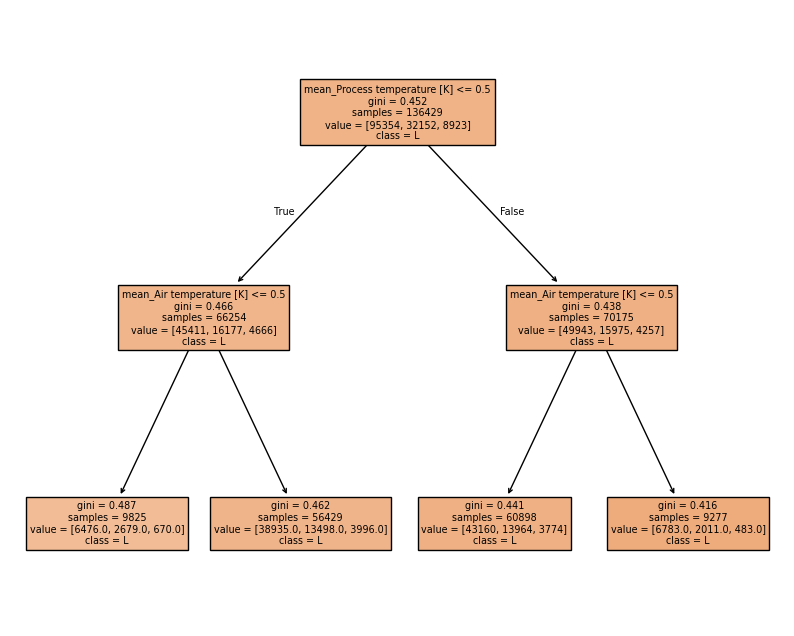

In [ ]:
plt.figure(figsize=(10,8))
plot_tree(
    model,
    feature_names=['mean_Process temperature [K]', 'mean_Air temperature [K]'],
    class_names=['L','M','N'],
    filled=True
)
plt.show()

In [ ]:
test['tipes'] = test['Type'].apply(lambda x: 0 if x == 'L' else (1 if x == 'M' else 2))

In [ ]:
train.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,tipes,mean_Air temperature [K],mean_Process temperature [K]
0,L50096,0.0,300.6,309.6,1596,36.1,140,0,0,0,0
1,M20343,1.0,302.6,312.1,1759,29.1,200,0,1,0,1
2,L49454,0.0,299.3,308.5,1805,26.5,25,0,0,1,0
3,L53355,0.0,301.0,310.9,1524,44.3,197,0,0,0,1
4,M24050,1.0,298.0,309.0,1641,35.4,34,0,1,1,0


In [ ]:
y_train=train['mean_Air temperature [K]']
x_train=train[['Rotational speed [rpm]','Process temperature [K]']]

In [ ]:
y_test=test['mean_Air temperature [K]']
x_test=test[['Rotational speed [rpm]','Process temperature [K]']]

In [ ]:
#now lets do logistic regression in Air temprature with type  and predict the data
model=LogisticRegression()
prediction=model.fit(x_train,y_train)

In [ ]:
train_pred1=model.predict_proba(x_train)
train_pred2=model.predict_proba(x_test)

In [ ]:
train_class1=model.predict(x_train)
train_class2=model.predict(x_test)

In [ ]:
pickle.dump(train_class1, open("logreg.pkl", "wb"))

<Axes: >

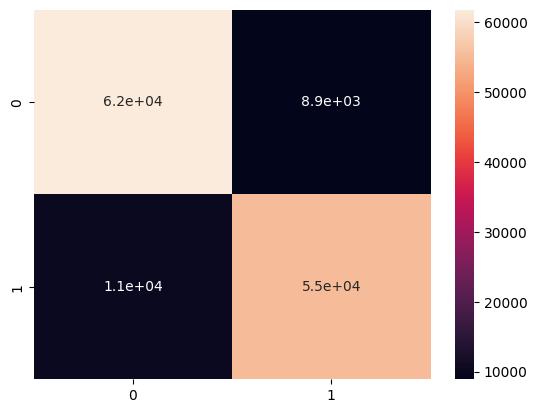

In [ ]:
cm1=confusion_matrix(y_train,train_class1)
sns.heatmap(cm1,annot=True)

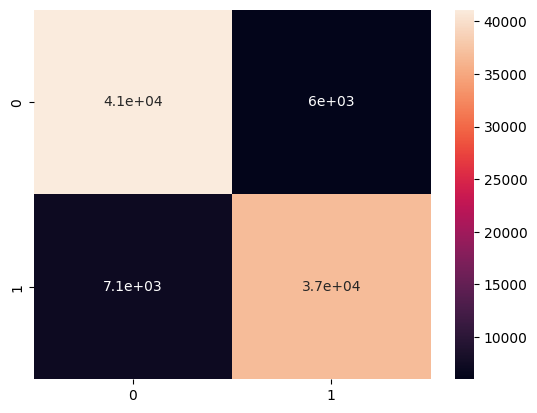

In [ ]:
cm2=confusion_matrix(y_test,train_class2)
sns.heatmap(cm2,annot=True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,train_class2)
print(accuracy)

0.856026123095191


In [ ]:
from sklearn.metrics import roc_auc_score
test_score=roc_auc_score(y_test,train_pred2[:, 1])
print(test_score)


0.9490904094853816


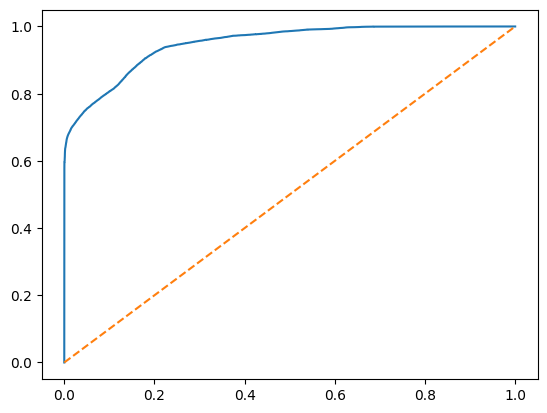

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresold=roc_curve(y_test,train_pred2[:, 1])
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle="--")
plt.show()

3.K means clustering

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)


In [ ]:
print(wcss)

[2626207860.7840557, 1116650390.377612, 633055628.6705393, 410489117.60270256, 279271913.03501385, 193354774.13558725, 151260146.45509285, 121790470.36972308, 93361270.06364675, 77678894.62427191]


In [ ]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

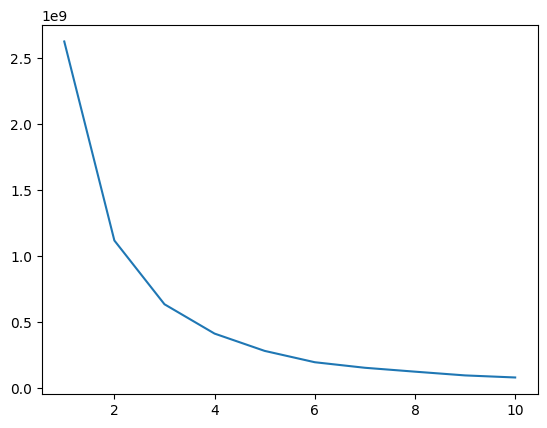

In [ ]:
plt.plot(range(1,11),wcss)
plt.show()

In [ ]:
pred=kmeans.predict(x_test)

In [ ]:
pickle.dump(pred, open("kmeans.pkl", "wb"))

In [ ]:
accuracy2=accuracy_score(y_test,pred)
print(accuracy2)

0.1537700376014249


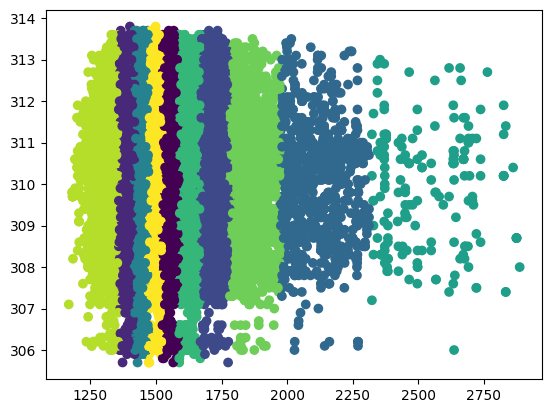

In [ ]:
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=pred, cmap="viridis")
plt.show()


In [ ]:
#now lets do heirarichal clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x_train)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [12.5, 12.5, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [82.5, 82.5, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [150.0, 150.0, 170.0, 170.0],
  [185.0, 185.0, 195.0, 195.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [190.0, 190.0, 212.5, 212.5],
  [160.0, 160.0, 201.25, 201.25],
  [101.25, 101.25, 180.625, 180.625],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 370.0, 37

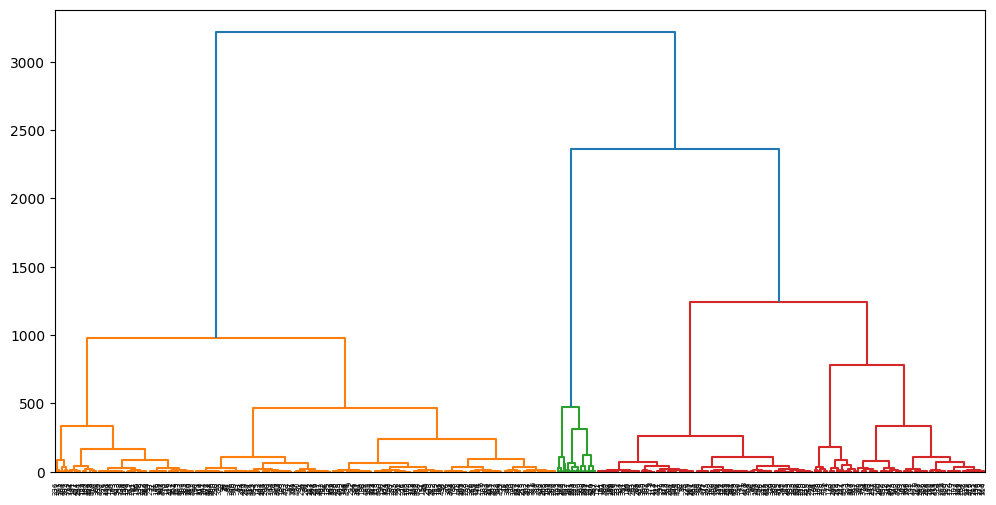

In [ ]:
sample=x_train[:500]
plt.figure(figsize=(12, 6))
sch.dendrogram(sch.linkage(sample,method='ward'))

In [ ]:
hc=AgglomerativeClustering(n_clusters=3)
pred=hc.fit_predict(sample)


In [ ]:
accuracy3=accuracy_score(y_test[:500],pred)
print(accuracy3)

0.502


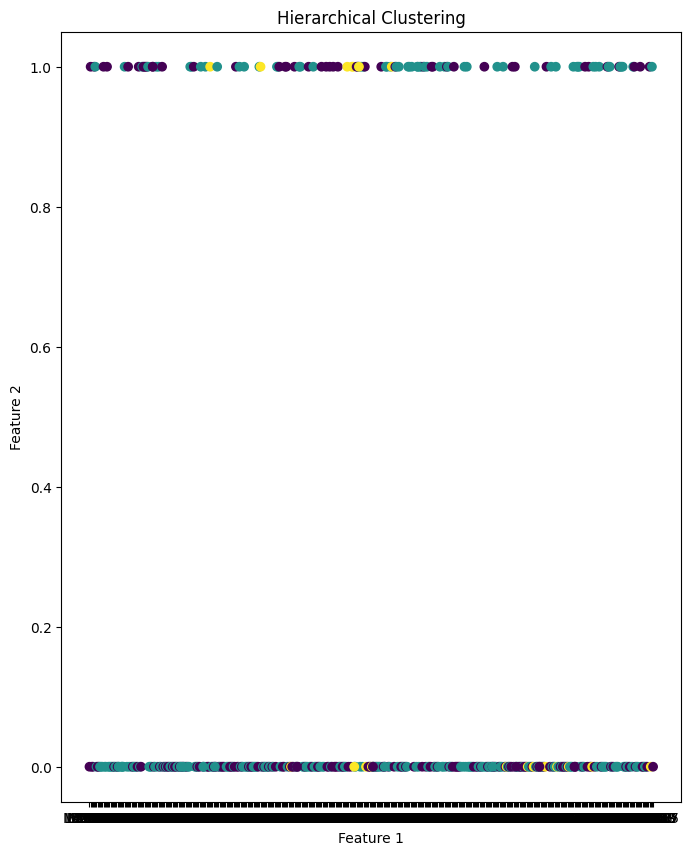

In [ ]:
plt.figure(figsize=(8, 10))
plt.scatter(train.iloc[:, 0][:500], train.iloc[:, 1][:500], c=pred)
plt.title("Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()




In [ ]:
#DBSCAN clustering
dbscan=DBSCAN(eps=0.5)

In [ ]:
dbscan.fit(x_train[:500])

DBSCAN()

In [ ]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

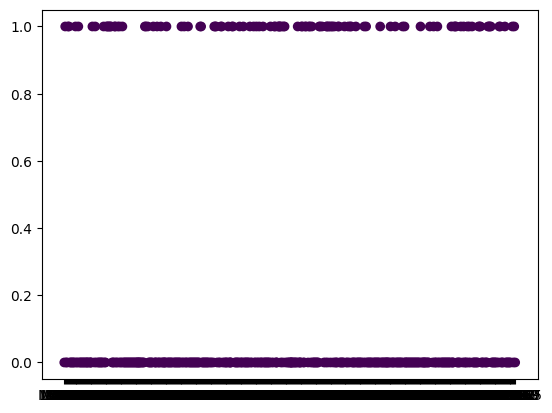

In [ ]:
plt.scatter(train.iloc[:, 0][:500], train.iloc[:, 1][:500],c=dbscan.labels_)